<a href="https://colab.research.google.com/github/EsraaMosaad/ASDC-AI-Data-analysis-internship/blob/main/dental_X_ray_images_using_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Install the ultralytics package using pip
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 7.4 MB/s eta 0:00:00


In [7]:
#Change the working directory to the downloaded data directory and check the yaml file.
%cd /content/drive/MyDrive/dataset

/content/drive/MyDrive/dataset


In [8]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [14]:
#Instance
model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8n-seg.pt')  # Transfer the weights from a pretrained model (recommended for training)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [9]:
#Withut this Colab is giving an error when installing Roboflow
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [8]:
# !pip install roboflow --quiet

# from roboflow import Roboflow
# rf = Roboflow(api_key=api_key)
# project = rf.workspace("bassem-ahmed-ouwsa").project("dentistry-vbril")
# dataset = project.version(1).download("yolov8")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.

NameError: ignored

In [9]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat //content/drive/MyDrive/dataset/Dentistry-1/data.yaml

names:
- '11'
- '12'
- '13'
- '14'
- '15'
- '16'
- '17'
- '18'
- '21'
- '22'
- '23'
- '24'
- '25'
- '26'
- '27'
- '28'
- '31'
- '32'
- '33'
- '34'
- '35'
- '36'
- '37'
- '38'
- '41'
- '42'
- '43'
- '44'
- '45'
- '46'
- '47'
- '48'
- Crown
- Implant
- Root Canal
nc: 35
roboflow:
  license: CC BY 4.0
  project: dentistry-vbril
  url: https://universe.roboflow.com/bassem-ahmed-ouwsa/dentistry-vbril/dataset/1
  version: 1
  workspace: bassem-ahmed-ouwsa
test: ../test/images
train: /content/drive/MyDrive/dataset/Dentistry-1/train/images
val: /content/drive/MyDrive/dataset/Dentistry-1/valid/images


In [10]:
# define number of classes based on YAML
import yaml
with open("/content/drive/MyDrive/dataset/Dentistry-1/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [11]:
#Define a project --> Destination directory for all results
project = "/content/drive/MyDrive/dataset/Dentistry-1/YOLOV8-data-results"
#Define subdirectory for this specific training
name = "200_epochs-" #note that if you run the training again, it creates a directory: 200_epochs-2

In [15]:
# Load the pre-trained weights
pretrained_weights = "/content/drive/MyDrive/dataset/Dentistry-1/YOLOV8-data-results/200_epochs-3/weights/last.pt"
model = model.load(pretrained_weights)


Transferred 381/417 items from pretrained weights


In [16]:
# Train the model
results = model.train(data='/content/drive/MyDrive/dataset/Dentistry-1/data.yaml',
                      project=project,
                      name=name,
                      epochs=20,
                      patience=0, #I am setting patience=0 to disable early stopping.
                      batch=4,
                      imgsz=800)#224*224

Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/dataset/Dentistry-1/data.yaml, epochs=20, time=None, patience=0, batch=4, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/dataset/Dentistry-1/YOLOV8-data-results, name=200_epochs-4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

100%|██████████| 755k/755k [00:00<00:00, 19.3MB/s]


Overriding model.yaml nc=80 with nc=35

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/dataset/Dentistry-1/train/labels.cache... 452 images, 0 backgrounds, 0 corrupt: 100%|██████████| 452/452 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/dataset/Dentistry-1/valid/labels.cache... 113 images, 0 backgrounds, 0 corrupt: 100%|██████████| 113/113 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/dataset/Dentistry-1/YOLOV8-data-results/200_epochs-4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000256, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20       7.5G      1.201      1.836      4.009      1.044        265        800: 100%|██████████| 113/113 [01:24<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:18<00:00,  1.23s/it]

                   all        113       3363      0.137      0.796      0.452       0.28      0.135      0.787      0.444      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20      7.37G      1.251       1.87      2.835      1.062        210        800: 100%|██████████| 113/113 [01:15<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.40it/s]


                   all        113       3363      0.644       0.64       0.68      0.415       0.64      0.634      0.668      0.368

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20      8.72G      1.287       1.88      2.238       1.08        209        800: 100%|██████████| 113/113 [01:18<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.83it/s]


                   all        113       3363      0.601       0.69      0.688      0.412      0.594      0.682      0.676      0.366

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20      9.46G      1.288      1.878      1.844      1.089        198        800: 100%|██████████| 113/113 [01:14<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.30it/s]


                   all        113       3363      0.612      0.721      0.671      0.405      0.606      0.714       0.66      0.365

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20      8.11G      1.276      1.837      1.615      1.087        264        800: 100%|██████████| 113/113 [01:12<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.21it/s]


                   all        113       3363      0.521      0.697      0.566      0.334      0.515      0.689      0.556        0.3

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20      10.3G      1.259      1.855      1.469      1.099        155        800: 100%|██████████| 113/113 [01:11<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.24it/s]


                   all        113       3363      0.575       0.71      0.631      0.375      0.568      0.704      0.621      0.338

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.74G      1.256      1.875      1.404      1.094        142        800: 100%|██████████| 113/113 [01:12<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.17it/s]


                   all        113       3363      0.564      0.705      0.604      0.358      0.555      0.704      0.595      0.324

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20        10G      1.254      1.856       1.37       1.09        367        800: 100%|██████████| 113/113 [01:11<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.04it/s]


                   all        113       3363      0.626      0.719      0.678      0.409      0.621      0.713      0.669      0.366

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20      12.3G      1.241      1.844      1.315      1.095        114        800: 100%|██████████| 113/113 [01:12<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.21it/s]


                   all        113       3363      0.677      0.764      0.751      0.451      0.672      0.758      0.742      0.406

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20      7.21G      1.237      1.847      1.278        1.1        168        800: 100%|██████████| 113/113 [01:11<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.23it/s]


                   all        113       3363      0.733      0.754      0.782      0.468      0.724      0.749      0.771      0.424
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.19G      1.188      1.777      1.035      1.114        125        800: 100%|██████████| 113/113 [00:47<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.48it/s]


                   all        113       3363      0.701      0.755      0.774      0.466      0.694      0.749      0.761      0.421

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.08G      1.185      1.776          1      1.115        127        800: 100%|██████████| 113/113 [00:42<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.61it/s]


                   all        113       3363      0.686      0.788      0.761       0.46      0.682      0.781      0.751       0.41

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.27G      1.171      1.759     0.9741       1.12        119        800: 100%|██████████| 113/113 [00:46<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.62it/s]


                   all        113       3363      0.695      0.769       0.76       0.46       0.69      0.767      0.751      0.413

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.95G      1.165      1.742      0.944      1.109        122        800: 100%|██████████| 113/113 [00:44<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.51it/s]


                   all        113       3363      0.649       0.75      0.715      0.431      0.645      0.746      0.706      0.385

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.03G      1.162      1.748     0.9437       1.11        119        800: 100%|██████████| 113/113 [00:45<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.82it/s]


                   all        113       3363      0.741       0.78      0.787      0.477      0.738      0.774      0.778      0.427

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.26G      1.158      1.746     0.9162      1.109        124        800: 100%|██████████| 113/113 [00:45<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.81it/s]


                   all        113       3363      0.751      0.794      0.805      0.487      0.747      0.789      0.796      0.436

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.01G      1.149      1.743     0.9111      1.103        114        800: 100%|██████████| 113/113 [00:45<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.81it/s]


                   all        113       3363      0.673      0.761       0.73      0.442      0.669      0.757      0.722      0.399

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.72G      1.143      1.731     0.8965      1.102        130        800: 100%|██████████| 113/113 [00:44<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.31it/s]


                   all        113       3363      0.739      0.771      0.783      0.474      0.734      0.765      0.774      0.429

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.01G      1.135      1.718     0.8842      1.099        131        800: 100%|██████████| 113/113 [00:43<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.77it/s]


                   all        113       3363      0.754      0.788      0.802      0.487      0.752      0.782      0.793       0.44

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.09G      1.132      1.727     0.8691      1.096        121        800: 100%|██████████| 113/113 [00:43<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.60it/s]


                   all        113       3363      0.718      0.782       0.78      0.474      0.713      0.774      0.769      0.424

20 epochs completed in 0.371 hours.
Optimizer stripped from /content/drive/MyDrive/dataset/Dentistry-1/YOLOV8-data-results/200_epochs-4/weights/last.pt, 6.8MB
Optimizer stripped from /content/drive/MyDrive/dataset/Dentistry-1/YOLOV8-data-results/200_epochs-4/weights/best.pt, 6.8MB

Validating /content/drive/MyDrive/dataset/Dentistry-1/YOLOV8-data-results/200_epochs-4/weights/best.pt...
Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3264889 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.02it/s]


                   all        113       3363       0.75       0.79      0.801      0.487      0.747      0.785      0.793      0.439
                    11        113        107      0.758      0.788      0.812      0.472      0.757      0.787      0.812      0.448
                    12        113        106      0.704      0.807      0.804       0.49      0.703      0.805      0.804      0.485
                    13        113        102      0.684      0.775      0.734      0.443      0.667      0.755      0.717      0.355
                    14        113         98      0.672      0.755      0.773      0.476      0.645      0.724      0.696      0.233
                    15        113         89      0.608      0.674      0.684      0.402      0.588      0.652      0.646      0.314
                    16        113         85      0.677      0.776      0.691      0.439       0.67      0.765      0.681      0.408
                    17        113         89      0.644      0.674   

In [18]:
from IPython.display import Image

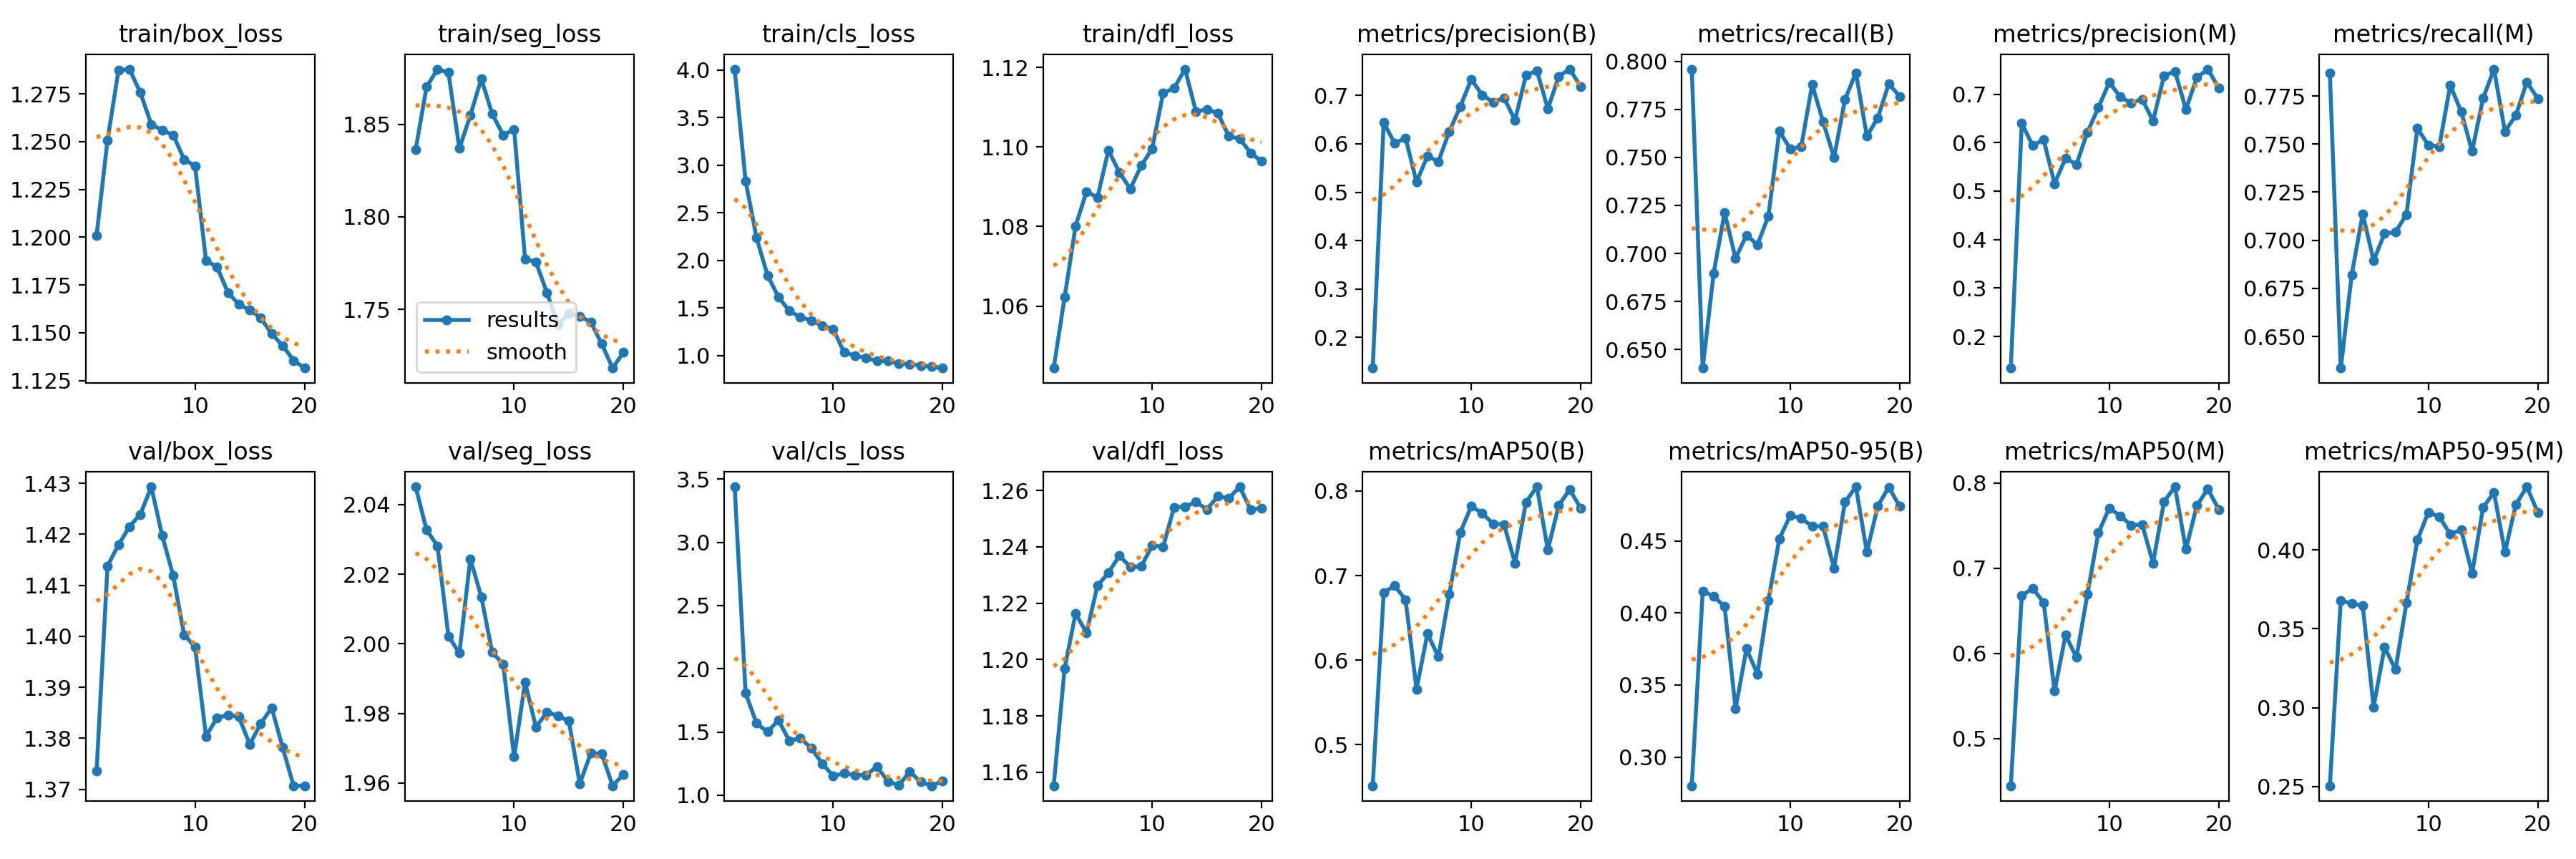

In [19]:
Image("/content/drive/MyDrive/dataset/Dentistry-1/YOLOV8-data-results/200_epochs-4/results.png")

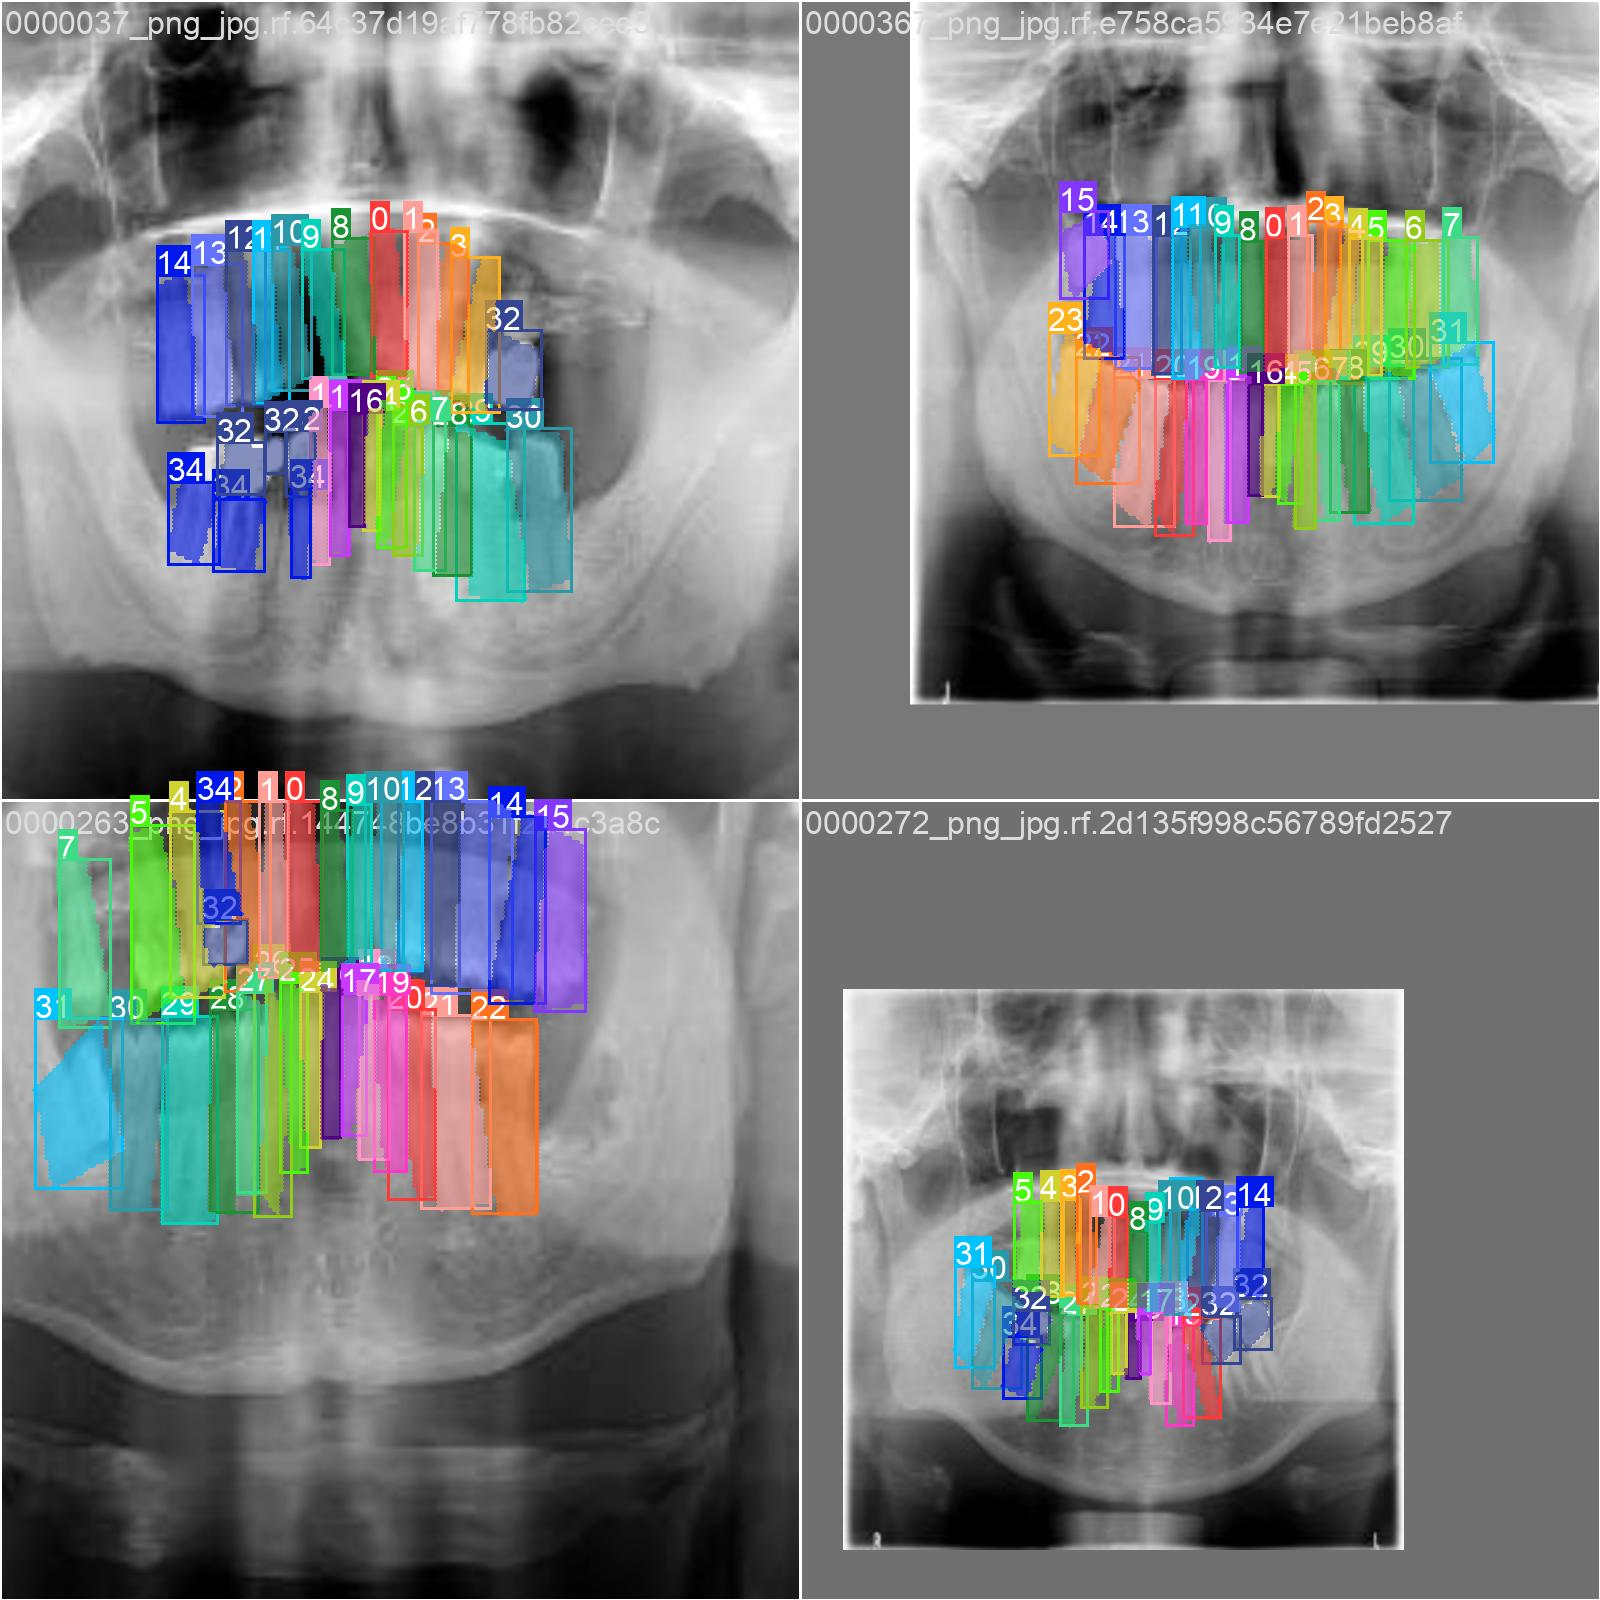

In [27]:
Image(filename='/content/drive/MyDrive/dataset/Dentistry-1/YOLOV8-data-results/200_epochs-4/train_batch1132.jpg', width=600)


In [29]:
my_new_model = YOLO("/content/drive/MyDrive/dataset/Dentistry-1/YOLOV8-data-results/200_epochs-4/weights/best.pt")

In [44]:
new_image = '/content/drive/MyDrive/dataset/Dentistry-1/valid/images/0000082_png_jpg.rf.514b5782354da3009a9974dd4b8ed4ee.jpg'
new_results = my_new_model.predict(new_image, conf=0.3)  #Adjust conf threshold


image 1/1 /content/drive/MyDrive/dataset/Dentistry-1/valid/images/0000082_png_jpg.rf.514b5782354da3009a9974dd4b8ed4ee.jpg: 800x800 2 12s, 1 13, 2 14s, 2 15s, 1 16, 1 17, 1 22, 1 23, 1 24, 2 31s, 1 32, 1 33, 1 34, 1 35, 1 37, 1 43, 1 44, 1 45, 1 47, 5 Crowns, 2 Root Canals, 45.3ms
Speed: 4.7ms preprocess, 45.3ms inference, 21.4ms postprocess per image at shape (1, 3, 800, 800)


In [73]:
new_results[0].names

{0: '11',
 1: '12',
 2: '13',
 3: '14',
 4: '15',
 5: '16',
 6: '17',
 7: '18',
 8: '21',
 9: '22',
 10: '23',
 11: '24',
 12: '25',
 13: '26',
 14: '27',
 15: '28',
 16: '31',
 17: '32',
 18: '33',
 19: '34',
 20: '35',
 21: '36',
 22: '37',
 23: '38',
 24: '41',
 25: '42',
 26: '43',
 27: '44',
 28: '45',
 29: '46',
 30: '47',
 31: '48',
 32: 'Crown',
 33: 'Implant',
 34: 'Root Canal'}

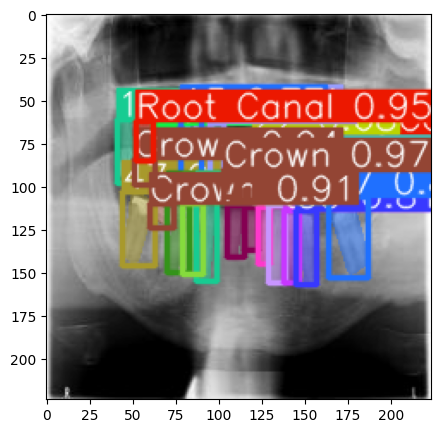

In [46]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(5, 5))
plt.imshow(new_result_array)

In [52]:
new_result = new_results[0]
extracted_masks = new_result.masks.data

In [48]:
class_names =new_result.names.values()
class_names


dict_values(['11', '12', '13', '14', '15', '16', '17', '18', '21', '22', '23', '24', '25', '26', '27', '28', '31', '32', '33', '34', '35', '36', '37', '38', '41', '42', '43', '44', '45', '46', '47', '48', 'Crown', 'Implant', 'Root Canal'])

In [53]:
# Extract the boxes, which likely contain class IDs
detected_boxes = new_result.boxes.data
# Extract class IDs from the detected boxes
class_labels = detected_boxes[:, -1].int().tolist()
# Initialize a dictionary to hold masks by class
masks_by_class = {name: [] for name in new_result.names.values()}

# Iterate through the masks and class labels
for mask, class_id in zip(extracted_masks, class_labels):
    class_name = new_result.names[class_id]  # Map class ID to class name
    masks_by_class[class_name].append(mask.cpu().numpy())

In [54]:
for class_name, masks in masks_by_class.items():
    print(f"Class Name: {class_name}, Number of Masks: {len(masks)}")

Class Name: 11, Number of Masks: 0
Class Name: 12, Number of Masks: 2
Class Name: 13, Number of Masks: 1
Class Name: 14, Number of Masks: 2
Class Name: 15, Number of Masks: 2
Class Name: 16, Number of Masks: 1
Class Name: 17, Number of Masks: 1
Class Name: 18, Number of Masks: 0
Class Name: 21, Number of Masks: 0
Class Name: 22, Number of Masks: 1
Class Name: 23, Number of Masks: 1
Class Name: 24, Number of Masks: 1
Class Name: 25, Number of Masks: 0
Class Name: 26, Number of Masks: 0
Class Name: 27, Number of Masks: 0
Class Name: 28, Number of Masks: 0
Class Name: 31, Number of Masks: 2
Class Name: 32, Number of Masks: 1
Class Name: 33, Number of Masks: 1
Class Name: 34, Number of Masks: 1
Class Name: 35, Number of Masks: 1
Class Name: 36, Number of Masks: 0
Class Name: 37, Number of Masks: 1
Class Name: 38, Number of Masks: 0
Class Name: 41, Number of Masks: 0
Class Name: 42, Number of Masks: 0
Class Name: 43, Number of Masks: 1
Class Name: 44, Number of Masks: 1
Class Name: 45, Numb

In [59]:
# Extract the original image
orig_img = new_result.orig_img
orig_img.shape

(224, 224, 3)

In [67]:
from skimage import transform

# Assuming orig_img is your NumPy array representing the image with shape (224, 224, 3)
# Resize the image to (800, 800, 3)
resized_orig_img = transform.resize(orig_img, (800, 800))

In [69]:
resized_orig_img.shape

(800, 800, 3)

In [88]:
len(masks_by_class['Root Canal'])

2

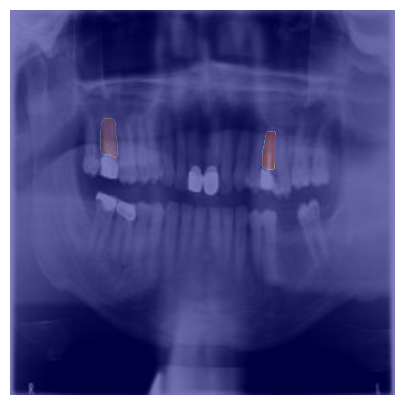

In [89]:
# Display the original image
plt.figure(figsize=(5, 5))
plt.imshow(resized_orig_img)

# Overlay the mask with some transparency
#plt.imshow(alpha_granule_masks[1], cmap='jet', alpha=0.3)
plt.imshow(masks_by_class['Root Canal'][0], cmap='jet', alpha=0.3)
plt.imshow(masks_by_class['Root Canal'][1], cmap='jet', alpha=0.3)
plt.axis('off') # Turn off axis labels
plt.show()